In [9]:
import pandas as pd
import numpy as np
import tdstool
from matplotlib import pyplot as plt

In [10]:
BG = tdstool.read_tdscsv(r"TDS数据/BGair.csv")
Sam = tdstool.read_tdscsv(r"TDS数据/tms0(1)_Time.csv")


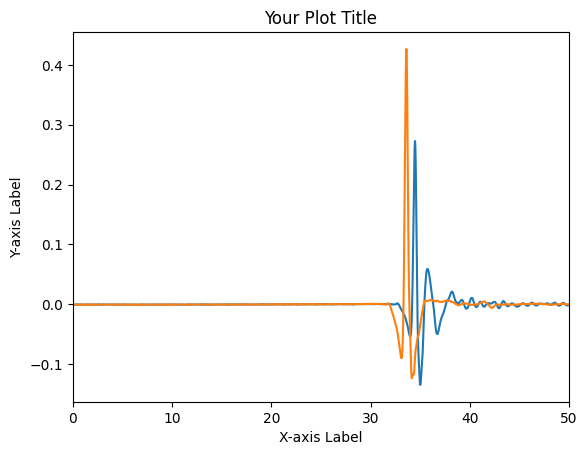

In [11]:

plt.xlim(0,50)
plt.plot(Sam.iloc[:, 0]  , Sam.iloc[:, 1]  )
plt.plot(BG.iloc[:, 0]  , BG.iloc[:, 1]  )
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Your Plot Title')
plt.show()


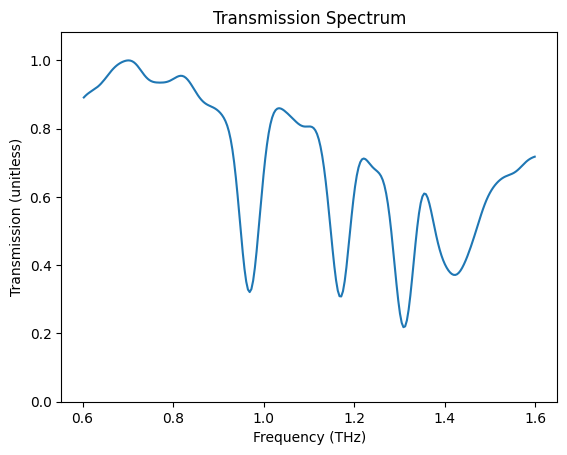

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# 初始化变量（示例数据）
dt = 0.002
add0 = 0
# BG和Sam是之前已经加载的数据(背景和样品)
refE = BG.iloc[:, 1]
samE = Sam.iloc[:, 1]
# 去除直流分量
refE = refE - np.mean(refE)
samE = samE - np.mean(samE)
refE_max_index = refE.idxmax()
samE_max_index = samE.idxmax()
BG_value = BG.iloc[refE_max_index, 0]
Sam_value = Sam.iloc[samE_max_index, 0]
Delay = BG_value - Sam_value
# 计算点数和频率分辨率
point = len(BG) + add0
df = 1 / (dt * point)
f = np.arange(0, point) * df

# 时间数组和相位
time = np.arange(0, point) * dt
phase0 = 2 * np.pi * f * Delay

# 窗函数
y1 = np.ones(point)
y2 = np.ones(point)
addwin = 1  # 设置为1启用窗函数
t11, t12 = 20, 65
t21, t22 = 20, 65

# 窗函数选择：0 - 矩形窗，1 - 汉宁窗，2 - 汉明窗，3 - 布莱克曼窗，4 - 凯撒窗
window_type = 3
kaiser_beta = 25  # 凯撒窗的beta参数

def apply_window(window_type, point, t_start, t_end):
    window_length = t_end - t_start
    if window_type == 0:  # 矩形窗
        window = np.ones(window_length)
    elif window_type == 1:  # 汉宁窗
        window = np.hanning(window_length)
    elif window_type == 2:  # 汉明窗
        window = np.hamming(window_length)
    elif window_type == 3:  # 布莱克曼窗
        window = np.blackman(window_length)
    elif window_type == 4:  # 凯撒窗
        window = np.kaiser(window_length, kaiser_beta)
    else:
        window = np.ones(window_length)
    full_window = np.zeros(point)
    full_window[t_start:t_end] = window
    return full_window

if addwin == 1:
    # 生成y1和y2的窗函数
    y1 = apply_window(window_type, point, int(t11/dt), int(t12/dt))
    y2 = apply_window(window_type, point, int(t21/dt), int(t22/dt))

# 信号处理
Eref = np.concatenate((refE * y1, np.zeros(add0)))
Esam = np.concatenate((samE * y2, np.zeros(add0)))
Eref1 = np.fft.fft(Eref)
Esam1 = np.fft.fft(Esam)
Pref = np.abs(Eref1)
Psam = np.abs(Esam1)
FFTt = Esam1 / Eref1
T = np.abs(FFTt)**2
TdB = 20 * np.log10(T)
n = 0
phase = -np.unwrap(np.angle(FFTt)) + n * np.pi
gro = np.diff(phase) / np.diff(f)

# 设置想要绘制的频率范围
f_min = 0.6 # 设置你希望的最小频率
f_max = 1.6    # 设置你希望的最大频率
index_min = np.argmax(f >= f_min)  # 找到最小频率的索引
index_max = np.argmax(f > f_max)   # 找到最大频率的索引

# 获取传输数据的最大值
max_T = np.max(T[index_min:index_max])
# 如果最大值大于1，则将所有点向下平移
if max_T > 1:
    shift = max_T - 1
    T_shifted = T[index_min:index_max] - shift
else:
    T_shifted = T[index_min:index_max]

# 绘图
fig, ax = plt.subplots()
ax.plot(f[index_min:index_max], T_shifted)
ax.set_ylim(0, max_T) 
# 根据平移后的数据调整y轴范围
ax.set_title('Transmission Spectrum')
ax.set_xlabel('Frequency (THz)')
ax.set_ylabel('Transmission (unitless)')
plt.show()


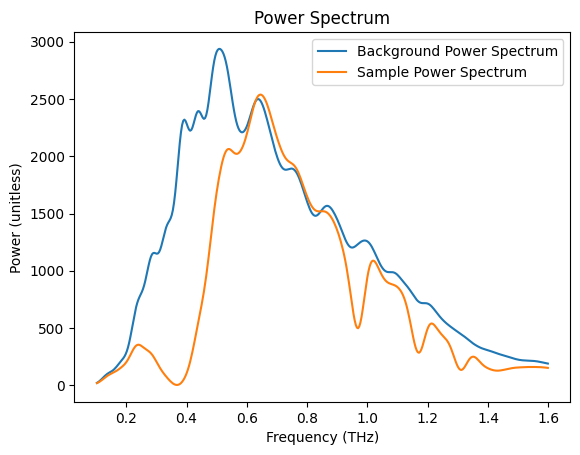

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# 初始化变量（示例数据）
dt = 0.002
add0 = 0
# BG和Sam是之前已经加载的数据(背景和样品)
refE = BG.iloc[:, 1]
samE = Sam.iloc[:, 1]
# 去除直流分量
refE = refE - np.mean(refE)
samE = samE - np.mean(samE)
refE_max_index = refE.idxmax()
samE_max_index = samE.idxmax()
BG_value = BG.iloc[refE_max_index, 0]
Sam_value = Sam.iloc[samE_max_index, 0]
Delay = BG_value - Sam_value
# 计算点数和频率分辨率
point = len(BG) + add0
df = 1 / (dt * point)
f = np.arange(0, point) * df

# 时间数组和相位
time = np.arange(0, point) * dt
phase0 = 2 * np.pi * f * Delay

# 窗函数
y1 = np.ones(point)
y2 = np.ones(point)
addwin = 1  # 设置为1启用窗函数
t11, t12 = 20, 65
t21, t22 = 20, 65

# 窗函数选择：0 - 矩形窗，1 - 汉宁窗，2 - 汉明窗，3 - 布莱克曼窗，4 - 凯撒窗
window_type = 3
kaiser_beta = 14  # 凯撒窗的beta参数

def apply_window(window_type, point, t_start, t_end):
    window_length = t_end - t_start
    if window_type == 0:  # 矩形窗
        window = np.ones(window_length)
    elif window_type == 1:  # 汉宁窗
        window = np.hanning(window_length)
    elif window_type == 2:  # 汉明窗
        window = np.hamming(window_length)
    elif window_type == 3:  # 布莱克曼窗
        window = np.blackman(window_length)
    elif window_type == 4:  # 凯撒窗
        window = np.kaiser(window_length, kaiser_beta)
    else:
        window = np.ones(window_length)
    full_window = np.zeros(point)
    full_window[t_start:t_end] = window
    return full_window

if addwin == 1:
    # 生成y1和y2的窗函数
    y1 = apply_window(window_type, point, int(t11/dt), int(t12/dt))
    y2 = apply_window(window_type, point, int(t21/dt), int(t22/dt))

# 信号处理
Eref = np.concatenate((refE * y1, np.zeros(add0)))
Esam = np.concatenate((samE * y2, np.zeros(add0)))
Eref1 = np.fft.fft(Eref)
Esam1 = np.fft.fft(Esam)
Pref = np.abs(Eref1)**2  # 计算功率谱
Psam = np.abs(Esam1)**2  # 计算功率谱
FFTt = Esam1 / Eref1
T = np.abs(FFTt)**2
TdB = 20 * np.log10(T)
n = 0
phase = -np.unwrap(np.angle(FFTt)) + n * np.pi
gro = np.diff(phase) / np.diff(f)

# 设置想要绘制的频率范围
f_min = 0.1 # 设置你希望的最小频率
f_max = 1.6    # 设置你希望的最大频率
index_min = np.argmax(f >= f_min)  # 找到最小频率的索引
index_max = np.argmax(f > f_max)   # 找到最大频率的索引

# 绘图
fig, ax = plt.subplots()
ax.plot(f[index_min:index_max], Pref[index_min:index_max], label='Background Power Spectrum')
ax.plot(f[index_min:index_max], Psam[index_min:index_max], label='Sample Power Spectrum')
ax.set_title('Power Spectrum')
ax.set_xlabel('Frequency (THz)')
ax.set_ylabel('Power (unitless)')
ax.legend()
plt.show()


In [34]:
import pandas as pd

# 创建DataFrame
data = {
    'Frequency (THz)': f[index_min:index_max],
    'Background Power Spectrum': Pref[index_min:index_max],
    'Sample Power Spectrum': Psam[index_min:index_max]
}
df = pd.DataFrame(data)

# 导出为CSV文件
df.to_csv('power_spectrum.csv', index=False)


In [7]:
import pandas as pd
import os

def merge_csv(folder_path):
    # 初始化一个空的DataFrame
    merged_df = pd.DataFrame()

    # 遍历文件夹中的所有文件
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            # 构造完整的文件路径
            file_path = os.path.join(folder_path, filename)
            # 读取CSV文件
            df = pd.read_csv(file_path)

            # 如果merged_df为空，则直接赋值，否则进行合并
            if merged_df.empty:
                merged_df = df
            else:
                # 使用merge函数通过共同列合并DataFrame，并指定自定义后缀
                merged_df = pd.merge(merged_df, df, on=merged_df.columns[0], suffixes=('', '_from_' + filename))

    return merged_df

# 调用函数，传入文件夹路径
folder_path = r'D:\WOrk\TDS实验数据存放\新建文件夹\5月29'
result_df = merge_csv(folder_path)

# 输出合并后的DataFrame
print(result_df)

# 可以选择将结果保存为新的CSV文件
result_df.to_csv('merged_output1.csv', index=False)


MergeError: Passing 'suffixes' which cause duplicate columns {'Data_5_from_5.csv', 'Data_7_from_5.csv', 'Data_19_from_5.csv', 'Data_16_from_5.csv', 'Data_10_from_5.csv', 'Data_30_from_5.csv', 'Data_26_from_5.csv', 'Data_1_from_5.csv', 'Data_3_from_5.csv', 'Data_8_from_5.csv', 'Data_9_from_5.csv', 'Data_18_from_5.csv', 'Data_11_from_5.csv', 'Data_20_from_5.csv', 'Data_6_from_5.csv', 'Data_15_from_5.csv', 'Data_29_from_5.csv', 'Data_13_from_5.csv', 'Data_4_from_5.csv', 'Data_23_from_5.csv', 'Data_25_from_5.csv', 'Data_12_from_5.csv', 'Data_14_from_5.csv', 'Data_27_from_5.csv', 'Data_17_from_5.csv', 'Data_22_from_5.csv', 'Data_21_from_5.csv', 'Data_28_from_5.csv', 'Data_24_from_5.csv', 'Data_2_from_5.csv'} is not allowed.